In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib inline 


In [4]:
#data initialisation
ceph_rawdata = "https://raw.githubusercontent.com/cheesyminecart/astro-data-bank/main/attempt%202%20-%20cepheid%20processing/VariCepheid_532693-532720.csv"
ceph_table = pd.read_csv(ceph_rawdata, on_bad_lines='skip')


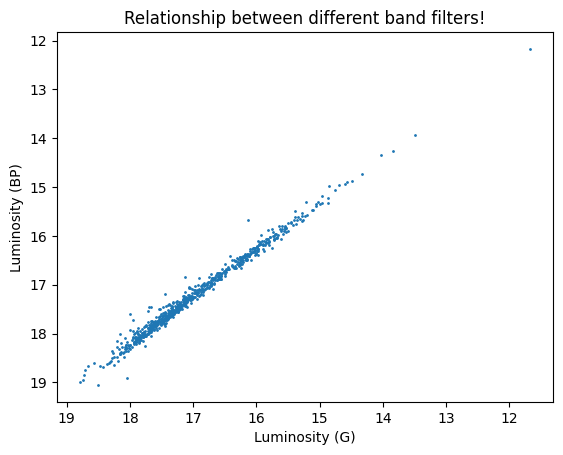

In [5]:
#the goal is to plot between the luminosity bands AND factor in for error. this is a preliminary test. 

#bands used
ceph_avgGband = ceph_table["int_average_g"]
ceph_avgBPband = ceph_table["int_average_bp"]

#error bar calibration

gbanderror = ceph_table["int_average_g_error"]
bpbanderror = ceph_table["int_average_bp_error"]


#graphing

fig, cephs_period_g = plt.subplots()
cephs_period_g.scatter(ceph_avgGband, ceph_avgBPband, s=1)

cephs_period_g.set_xlabel("Luminosity (G)")
cephs_period_g.set_ylabel("Luminosity (BP)")
cephs_period_g.invert_xaxis()
cephs_period_g.invert_yaxis()

cephs_period_g.set_title("Relationship between different band filters!")

plt.show()
    



/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


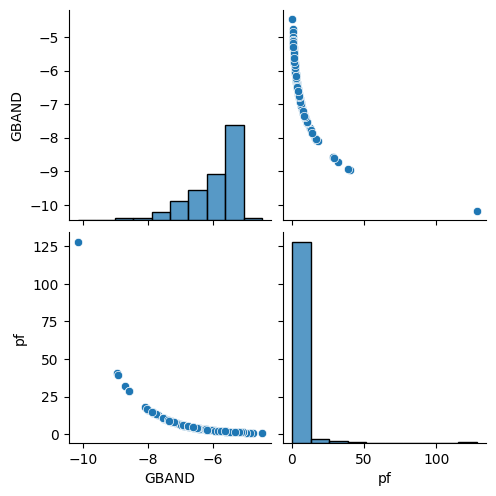

In [26]:
# pairplot - variables: int_average_g, int_average_bp, int_average_ rp, average_rv (radial velocity against luminosity in three bands!)

ceph_pf = ceph_table["pf"]
ceph_rp = ceph_table["int_average_rp"]

g_series = pd.Series(ceph_avgGband)
bp_series = pd.Series(ceph_avgBPband)
rp_series = pd.Series(ceph_rp)
pf_series = pd.Series(ceph_pf)

abs_mag = pd.Series(-2.43 * np.log10(ceph_pf) - 1) - 4.05

frame = {'GBAND':abs_mag,
         'pf': pf_series
    }

df = pd.DataFrame(frame)

sns.pairplot(df, diag_kws={'bins': 10})

# sns.lineplot(data=df[['GBAND', 'pf']])